# **A. Root finding for scalar nonlinear equations**

In [ ]:
# import all the packages here by

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def fpIterator(phi, x0, tol=1e-8, maxit=20):

    # initialize your output variables here (x, errEst, xHist)
    x, success, errEst, xHist = x0, True, [], []
    e = 1
    i = 0

    while (e > tol) and (i < maxit):

        xHist.append(x) # updare xHist
        xprev = x
        x = phi(x) # iteration
        if isinstance(x,np.ndarray):
          if x.any() == np.Inf:
            break
        else:
          if x == np.Inf:
            break
        e = np.linalg.norm(xprev - x)
        errEst.append(e) # update errEst
        i += 1

    if (e > tol):
      success = False

    return x, success, errEst, xHist

In [ ]:
## Discussion question A.1


phi = lambda x: 1/(x-1)
xvar = np.linspace(-3,3,13)
xvals = np.zeros(13)
tol = 1e-6

print('FP iteration results:\n')
print('    x0        success        x                     iter')
print('--------------------------------------------------------')
for i in range(13):
  x0 = xvar[i]
  vals = fpIterator(phi,x0,tol)
  print('  ',x0 ,'       ', vals[1],'    ' , vals[0] ,'       ', len(vals[3]))




# you will then add a print line with the values obtained using fpIterator
# other output formatting are accepted but they have to be easy to read

#  the result of this printing could help you debugging fpIterator


FP iteration results:

    x0        success        x                     iter
--------------------------------------------------------
   -3.0         True      -0.6180342255375164         16
   -2.5         True      -0.6180341985484069         16
   -2.0         True      -0.6180341640996919         16
   -1.5         True      -0.618034118602762         16
   -1.0         True      -0.6180338134001252         15
   -0.5         True      -0.6180338134001252         14
   0.0         True      -0.6180338134001252         16
   0.5         True      -0.6180341640996919         17
   1.0         False      inf         1
   1.5         False      inf         3
   2.0         False      inf         2
   2.5         True      -0.6180342255375164         18
   3.0         True      -0.6180341640996919         18


<ipython-input-3-ffe10aaa56df>:4: RuntimeWarning: divide by zero encountered in double_scalars
  phi = lambda x: 1/(x-1)


In [ ]:
def newton(f, df, x0, tol=1e-8, maxit=20):

    phi = lambda x: x - f(x)/df(x) # define iteration function
    x, success, errEst, xHist = fpIterator(phi, x0, tol, maxit)

    return x, success, errEst, xHist

order of convergence for fpIterator =  0.9999553771732622
asymptotic convergence factor for fpIterator =  0.3820246848739496
order of convergence for residual base =  2.000105122786058
asymptotic convergence factor for residual base =  0.4472567374728372
order of convergence for newton`s method =  1.9998345273997116
asymptotic convergence factor for newton`s method =  0.447256554025116


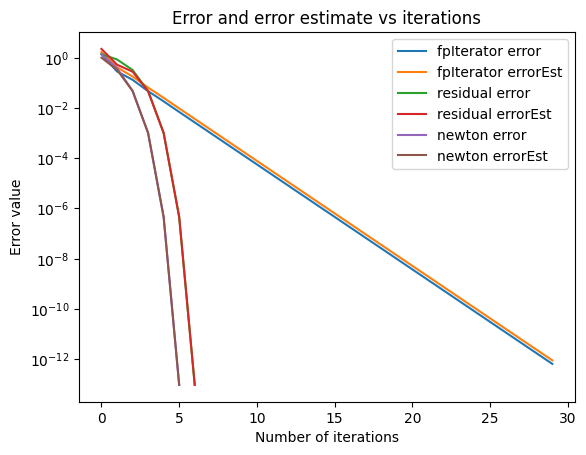

In [ ]:
phi = lambda x: 1/(x-1)
vals = fpIterator(phi,-2,1e-12,50)

error = abs(vals[3] - (1 - np.sqrt(5))/2)
errorEst = vals[2]

p = np.log( errorEst[len(errorEst)-1] / errorEst[len(errorEst)-2]) / np.log( errorEst[len(errorEst)-2] / errorEst[len(errorEst)-3])
print('order of convergence for fpIterator = ',p)

C = error[len(error)-1]/error[len(error)-2]
print('asymptotic convergence factor for fpIterator = ',C)


# -----------------------------------------------------------------------


phi = lambda x: x - (x**2-x-1)/(-np.sqrt(5)) # f(x) = x**2-x-1, f'(x*-) = -sqrt(5)
vals = fpIterator(phi,-2,1e-12,50)

error1 = abs(vals[3] - (1 - np.sqrt(5))/2)
errorEst1 = vals[2]

p = np.log( errorEst1[len(errorEst1)-1] / errorEst1[len(errorEst1)-2]) / np.log( errorEst1[len(errorEst1)-2] / errorEst1[len(errorEst1)-3])
print('order of convergence for residual base = ',p)

C = error1[len(error1)-1]/error1[len(error1)-2]**2
print('asymptotic convergence factor for residual base = ',C)

# ----------------------------------------------------------------------------------

f = lambda x: x**2-x-1
df = lambda x: 2*x - 1

vals = newton(f,df,-2,1e-12,50)

error2 = abs(vals[3] - (1 - np.sqrt(5))/2)
errorEst2 = vals[2]

p = np.log( errorEst2[len(errorEst2)-1] / errorEst2[len(errorEst2)-2]) / np.log( errorEst2[len(errorEst2)-2] / errorEst2[len(errorEst2)-3])
print('order of convergence for newton`s method = ',p)

C = error2[len(error2)-1]/(error2[len(error2)-2])**2

print('asymptotic convergence factor for newton`s method = ',C)

# ----------------------------------------------------------------------------

plt.semilogy(error)
plt.semilogy(errorEst)
plt.semilogy(error1)
plt.semilogy(errorEst1)
plt.semilogy(error2)
plt.semilogy(errorEst2)
plt.xlabel('Number of iterations')
plt.ylabel('Error value')
plt.title('Error and error estimate vs iterations')
plt.legend(['fpIterator error','fpIterator errorEst','residual error','residual errorEst','newton error','newton errorEst'])

<class 'numpy.ndarray'>


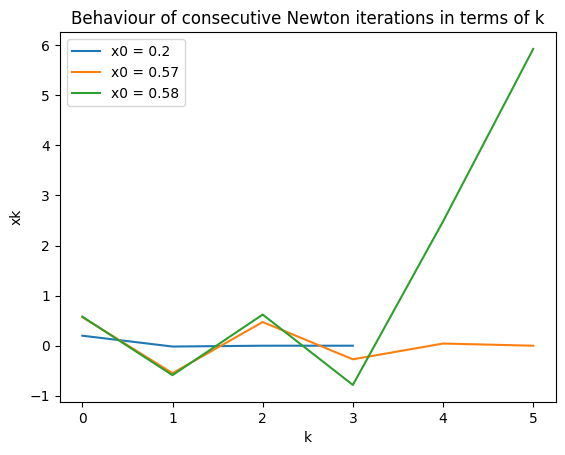

In [ ]:
f = lambda x: x/(1+x**2)
df = lambda x: (1-x**2)/(x**2+1)**2

x0 = [0.2,0.57,0.58]
for i in range(3):
  n = newton(f,df,x0[i])
  xhist = n[3]
  xk = np.array([xhist[j] for j in range(min(6,len(xhist)))]) # create array of xhist for the length of guesses
  x = [i for i in range(len(xk))] # create x axis
  plt.plot(x,xk)

plt.legend(['x0 = 0.2','x0 = 0.57','x0 = 0.58'])
plt.title('Behaviour of consecutive Newton iterations in terms of k')
plt.xlabel('k')
plt.ylabel('xk')

print(type(xk))

# **B. Root finding for systems of nonlinear equations**

In [ ]:
def newton(f, df, x0, tol=1e-8, maxit=20):

    if isinstance(x0,np.ndarray):
      phi = lambda x: x - np.matmul(np.linalg.inv(df(x)),f(x))
    else:
      phi = lambda x: x - f(x)/df(x) # define iteration function
    x, success, errEst, xHist = fpIterator(phi, x0, tol, maxit)

    return x, success, errEst, xHist

In [ ]:
# TEST FOR LINEAR SYSTEM

f = lambda x: np.array([1,2,3])-np.matmul(np.array([[1,2,8],[3,4,7],[3,2,5]]),x)
df = lambda x: (-1)*np.array([[1,2,8],[3,4,7],[3,2,5]])

inv = np.linalg.inv(np.array([[1,2,8],[3,4,7],[3,2,5]]))

newton(f,df,np.array([1,2,1]))

(array([ 1.2       , -0.63333333,  0.13333333]),
 True,
 [2.779488362191062, 1.011842062001899e-15],
 [array([1, 2, 1]), array([ 1.2       , -0.63333333,  0.13333333])])

In [ ]:
# TEST FOR NONLINEAR
z = np.array([np.sqrt(2),1/np.sqrt(2)])
n = np.array([1/np.sqrt(5),2/np.sqrt(5)])
t = np.array([2/np.sqrt(5),-1/np.sqrt(5)])
p = 0
F1 = lambda x: (x[0]/2)**2+x[1]**2-1
F2 = lambda x: np.matmul(n,x-z)-p-0.5*(np.matmul(t,x-z))**2

F = lambda x: np.array([F1(x),F2(x)])

DF = lambda x: np.array([[x[0]/2,2*x[1]],n-t*np.matmul(t,x-z)])

# newton(F,DF,np.array([1,0]))

In [ ]:
## THIS FUNCTION IS GIVEN TO THE STUDENTS

# plotResidual_partB
#
# INPUT
# p         parameter which shifts the parabola

def plotResidual_partB(p):

    plt.figure(figsize=(18,10))

    nHat = np.array([0.5, 1])
    nHat = nHat/np.linalg.norm(nHat)
    tHat = np.array([nHat[1], -nHat[0]])
    xHat = np.array([[2],[1]])/np.sqrt(2)

    # For plotting the curves we parametrize them using angle (F1) and tangential co-ordinate (F2)
    par1 = lambda theta, p:  np.array([[2*np.cos(theta)], [np.sin(theta)]])
    par2 = lambda t, p: np.outer((tHat), t) + np.outer( (nHat), (np.matmul(nHat,xHat) + (p+0.5*np.power(t-np.matmul(tHat,xHat), 2)) ) )
    parametrizations = [par1, par2]

    paramRanges = [[0, 2*np.pi], [-1, 2.5]]
    paramStyles = ['r-','r--']

    N = 100;
    xLim = [-5, 5]
    yLim = [-2.5, 3.5]

    # Plot contours of the error
    xVals = np.linspace(xLim[0], xLim[1], N)
    yVals = np.linspace(yLim[0], yLim[1], N)
    X, Y = np.array( np.meshgrid(xVals, yVals, indexing='xy') )

    s1 = lambda x,y: np.power( np.power(x/2, 2) + np.power(y, 2) - 1, 2)
    s2 = lambda x,y: np.power( nHat[0]*x + nHat[1]*y -np.matmul(nHat, xHat) - (p+0.5*np.power( (tHat[0]*x+tHat[1]*y-np.matmul(tHat, xHat)),2 )) ,2 )
    errFun = lambda x, y: np.sqrt(s1(x,y) + s2(x,y))
    Z = np.log10(errFun(X, Y))

    levels = np.arange(-2, 1, 0.25)
    plt.contourf( xVals, yVals, Z, levels )

    # Add parametrized curves
    i = 0
    for pdx in parametrizations:
        params = np.linspace(paramRanges[i][0], paramRanges[i][1], N)
        xyCoords = pdx(params, p)

        if i == 1:
            x = xyCoords[0, :]
            y = xyCoords[1, :]
        else:
            x = xyCoords[0, :][0]
            y = xyCoords[1, :][0]

        plt.plot(x, y, paramStyles[i])

        i += 1

    plt.colorbar()
    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$x_2$', fontsize=16)
    plt.title('Colormap corresponds to $\log_{{10}}\sqrt{{F_1^2 + F_2^2}}$, where $p = %4.2f $' % p, fontsize=16)


1.5700924586837776e-16
EXPLORE THE CONVERGENCE OF THE METHOD

    p      x0      success   iter    order    x
---------------------------------------------------------
-0.5 [0.51978637 3.39038835] True 7 2.003308674296401 [0.5955401  0.95463763]
-0.5 [4.09749514 1.60153397] True 7 1.982625389885399 [1.96985514 0.17296728]
0 [0.51978637 3.39038835] False 20 1.0000006160215142 [1.41421088 0.70710812]
0 [4.09749514 1.60153397] False 20 1.0000009304000312 [1.41421578 0.70710567]
0.5 [0.51978637 3.39038835] False 20 0.6700142285331432 [1.64025697 0.7727534 ]
0.5 [4.09749514 1.60153397] False 20 -2.3748283511863373 [2.17301471 0.52956322]


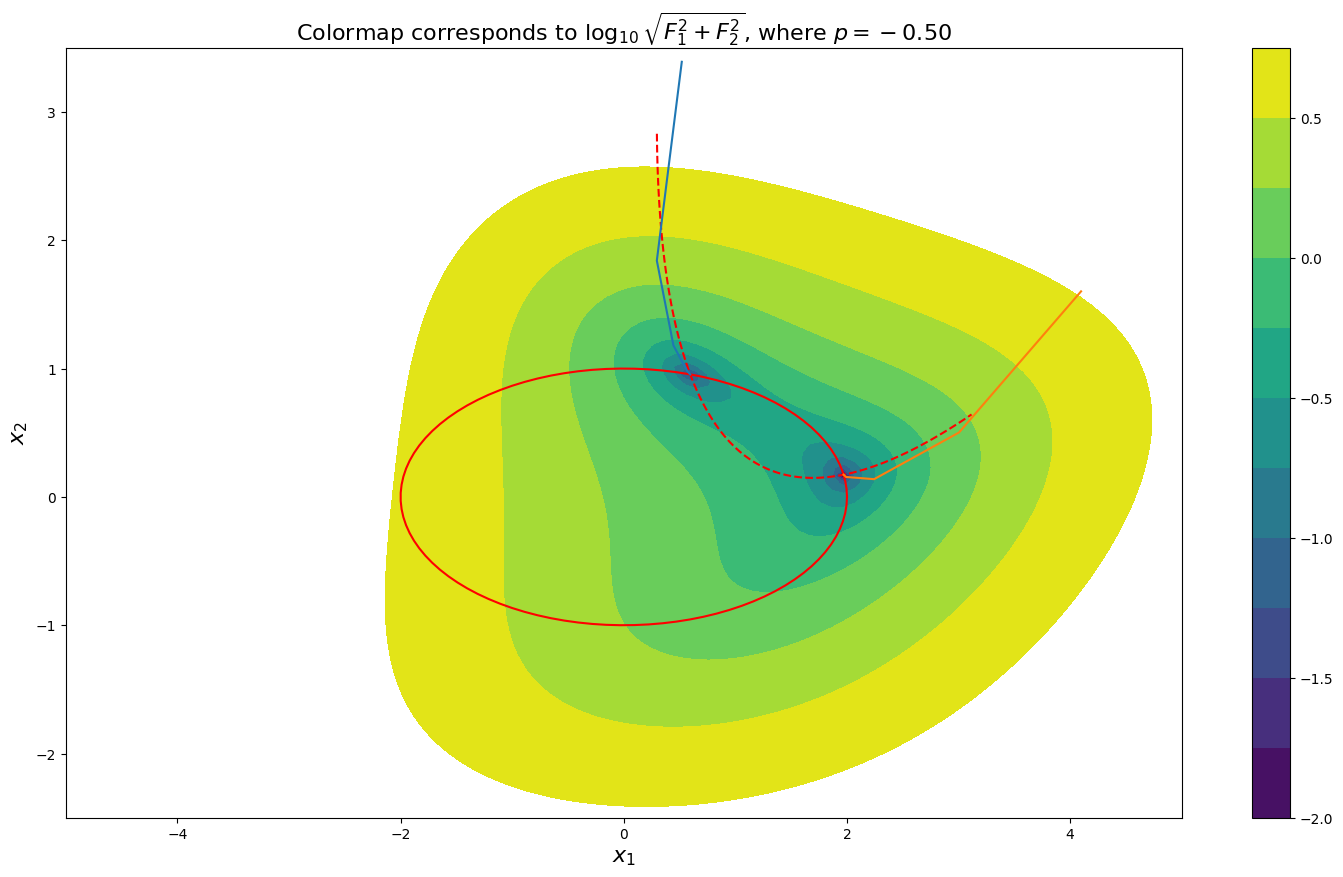

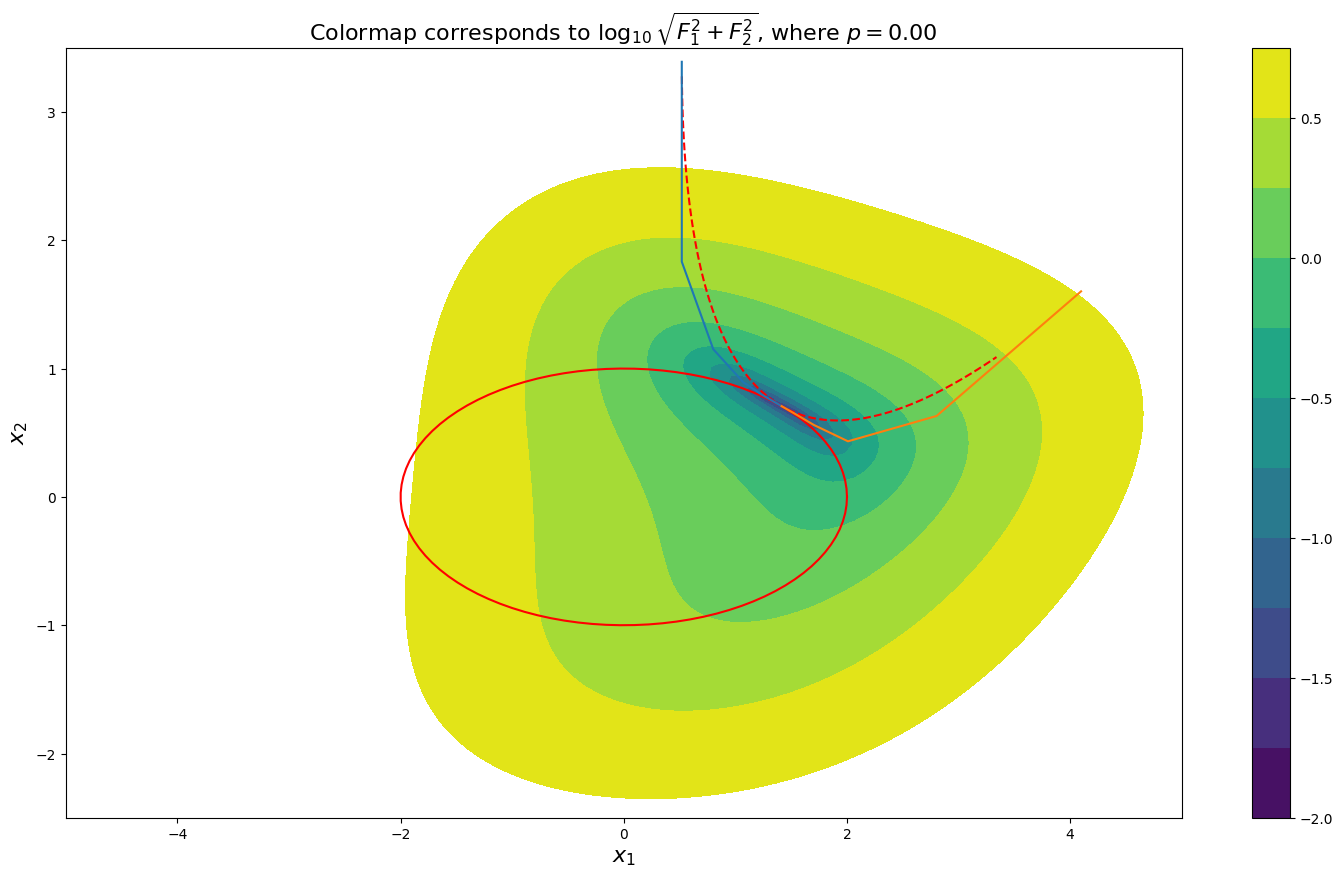

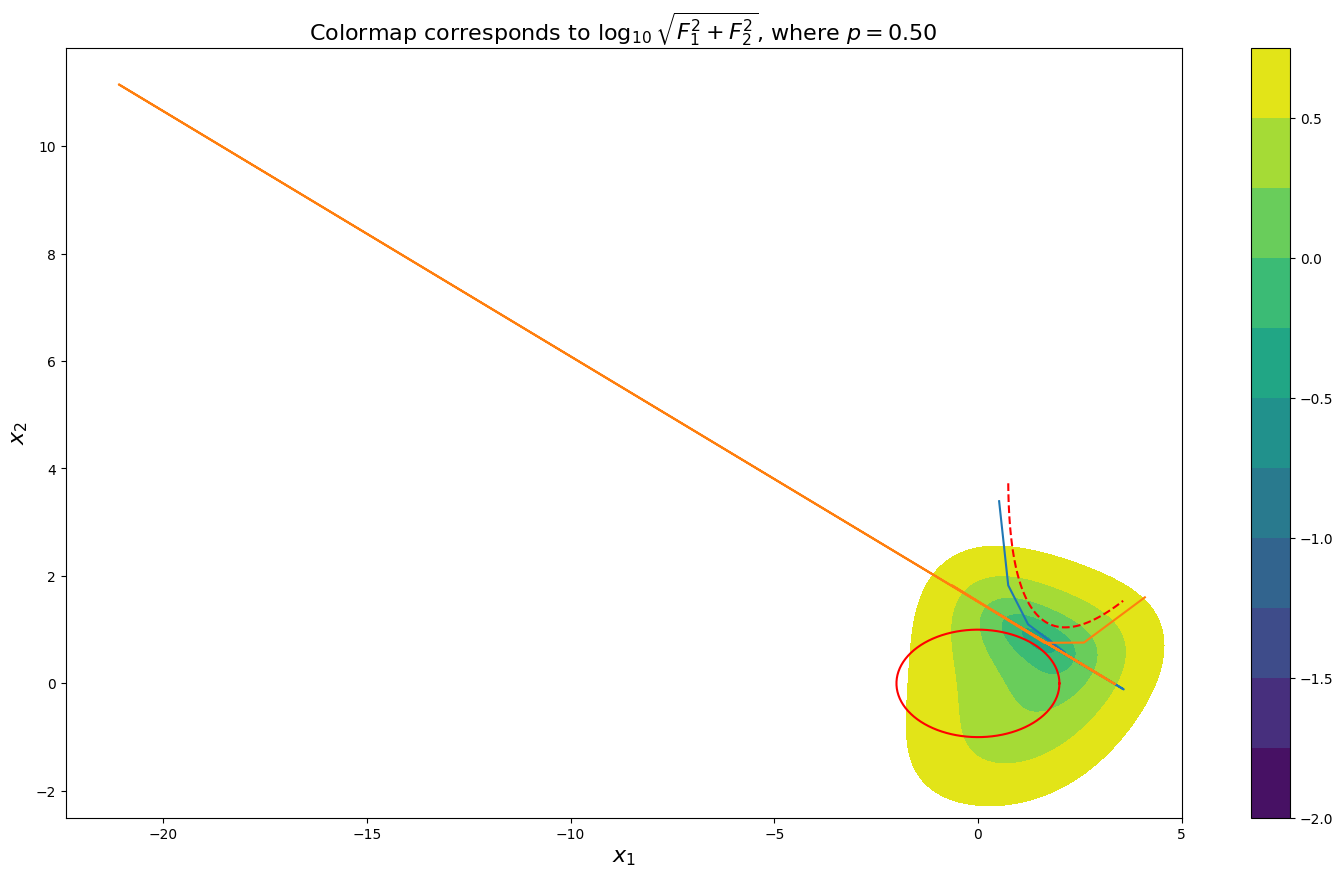

In [ ]:
## Discussion question B.1
z = np.array([np.sqrt(2),1/np.sqrt(2)])
n = np.array([1/np.sqrt(5),2/np.sqrt(5)])
t = np.array([2/np.sqrt(5),-1/np.sqrt(5)])

DF = lambda x: np.array([[x[0]/2,2*x[1]],n-t*np.matmul(t,x-z)])

print(np.linalg.det(DF(z)))

# set up the initial guesses as defined in the pdf
x0 = np.array([z+2*(n-t),z+2*(n+t)])

plist = [-0.5,0,0.5]

# print out the results as follows (or in similar and readable way)
print('EXPLORE THE CONVERGENCE OF THE METHOD')
print('\n    p      x0      success   iter    order    x')
print('---------------------------------------------------------')
for i in range(3):
  p = plist[i]
  F1 = lambda x: (x[0]/2)**2+x[1]**2-1
  F2 = lambda x: np.matmul(n,x-z)-p-0.5*(np.matmul(t,x-z))**2
  F = lambda x: np.array([F1(x),F2(x)])
  plotResidual_partB(p)
  for j in range(2):
    new = newton(F,DF,x0[j])
    errorEst2 = new[2]
    xHist1 = [new[3][i][0] for i in range(len(new[3]))]
    xHist2 = [new[3][i][1] for i in range(len(new[3]))]
    plt.plot(xHist1,xHist2)
    order = np.log( errorEst2[len(errorEst2)-1] / errorEst2[len(errorEst2)-2]) / np.log( errorEst2[len(errorEst2)-2] / errorEst2[len(errorEst2)-3])
    print(p,x0[j],new[1],len(new[3]),order,new[0])
    #plt.legend(('F1(x)','F2(x)'))

# plt.legend(['x-,p=-0.5','x+,p=-0.5','x-,p=0','x+,p=0','x-,p=0.5','x+,p=0.5'])


In [ ]:
def richardson(A, b, x0, tol=1e-6, maxit=20, alpha0=10.):


    if alpha0 == 10: # for dynamic
      r = lambda x:  b - np.matmul(A,x)
      alpha = lambda x:  np.matmul(r(x),r(x)) / np.matmul(np.matmul(r(x),A),r(x))
      phi = lambda x: x + alpha(x)*r(x)
      x, success, errEst, xHist = fpIterator(phi,x0,tol,maxit)

    else: # for static
      alpha = alpha0
      phi = lambda x: x + alpha*(b-np.matmul(A,x))
      x, success, errEst, xHist = fpIterator(phi,x0,tol,maxit)

    return x, success, errEst, xHist



In [ ]:
# Test the implementation on the example problem (7)
A = np.array([[2,-1],[-1,2]])
b = np.array([1,0])
richardson(A,b,[0,0])

(array([0.66666603, 0.33333302]),
 True,
 [0.5,
  0.25,
  0.125,
  0.0625,
  0.03125,
  0.015625,
  0.0078125,
  0.00390625,
  0.001953125,
  0.0009765625,
  0.00048828125,
  0.000244140625,
  0.0001220703125,
  6.103515625e-05,
  3.0517578125e-05,
  1.52587890625e-05,
  7.62939453125e-06,
  3.814697265625e-06,
  1.9073486328125e-06,
  9.5367431640625e-07],
 [[0, 0],
  array([0.5, 0. ]),
  array([0.5 , 0.25]),
  array([0.625, 0.25 ]),
  array([0.625 , 0.3125]),
  array([0.65625, 0.3125 ]),
  array([0.65625 , 0.328125]),
  array([0.6640625, 0.328125 ]),
  array([0.6640625 , 0.33203125]),
  array([0.66601562, 0.33203125]),
  array([0.66601562, 0.33300781]),
  array([0.66650391, 0.33300781]),
  array([0.66650391, 0.33325195]),
  array([0.66662598, 0.33325195]),
  array([0.66662598, 0.33331299]),
  array([0.66665649, 0.33331299]),
  array([0.66665649, 0.33332825]),
  array([0.66666412, 0.33332825]),
  array([0.66666412, 0.33333206]),
  array([0.66666603, 0.33333206])])

Text(0.5, 1.0, 'Iterations of static Richardson as a function of alpha')

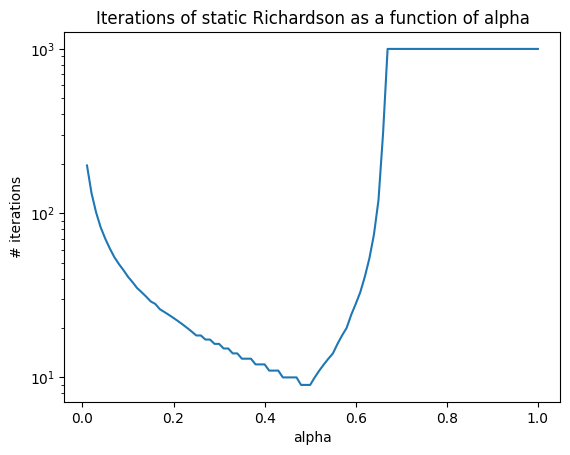

In [ ]:
## Discussion question C.1

# set up the inputs of richardson() and consider creating a loop to vary alpha
# and saving the number of itreations (it should help to minimize errors)

# IMPORTANT: the output of this cell is a single figure containing the number
# of iterations against the value of alpha in a semilogy scale

alpha = [i/100 for i in range(1,101)]
it = []
for i in range(100):
  it.append(len(richardson(A,b,[0,0],1e-3,10**3,alpha[i])[3]) - 1)

plt.semilogy(alpha,it)
plt.xlabel('alpha')
plt.ylabel('# iterations')
plt.title('Iterations of static Richardson as a function of alpha')

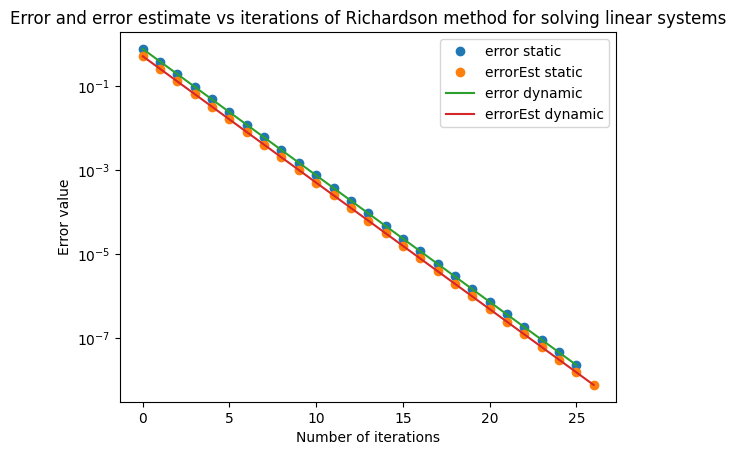

In [ ]:
#------------------------------------------------------------------------------
#theoretical optimum as the eigenvalues are 1,3 is 2/(1+3) = 1/2
alpha_opt = 1/2
x,success,errEst,xHist = richardson(A,b,[0,0],1e-8,10**3,alpha_opt)

X = (xHist - np.array([2/3 , 1/3]))

error = [np.linalg.norm([X[i]]) for i in range(len(X)-1)]
#------------------------------------------------------------------------------
x,success,errEst1,xHist = richardson(A,b,[0,0],1e-8,10**3)

X = (xHist - np.array([2/3 , 1/3]))

error1 = [np.linalg.norm([X[i]]) for i in range(len(X)-1)]
#------------------------------------------------------------------------------

plt.semilogy(error,'o')
plt.semilogy(errEst,'o')
plt.semilogy(error1)
plt.semilogy(errEst1)

plt.xlabel('Number of iterations')
plt.ylabel('Error value')
plt.title('Error and error estimate vs iterations of Richardson method for solving linear systems')
plt.legend(['error static','errorEst static','error dynamic','errorEst dynamic'])

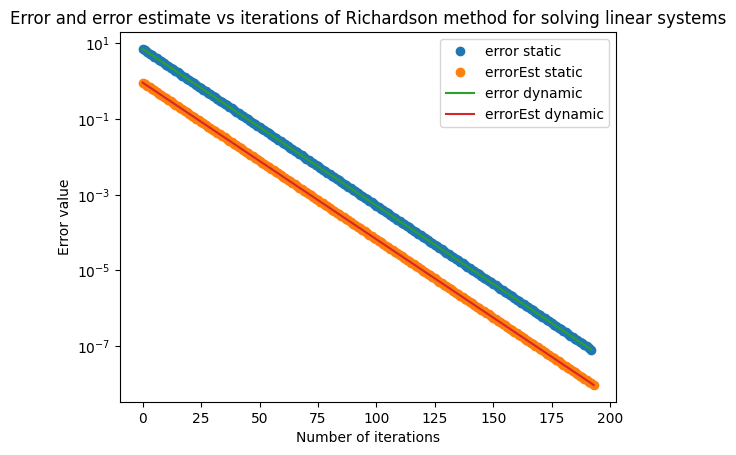

In [ ]:
## Discussion question C.2 (c)-(d)

# repeat the previous exercise with the needed modifications

A = np.array([[1.1,-1],[-1,1.1]])
b = np.array([1,0])


alpha_opt = 10/11
x,success,errEst,xHist = richardson(A,b,[0,0],1e-8,10**3,alpha_opt)

X = (xHist - np.array([110/21 , 100/21]))

error = [np.linalg.norm([X[i]]) for i in range(len(X)-1)]
#------------------------------------------------------------------------------
x,success,errEst1,xHist = richardson(A,b,[0,0],1e-8,10**3)

X = (xHist - np.array([110/21 , 100/21]))

error1 = [np.linalg.norm([X[i]]) for i in range(len(X)-1)]
#------------------------------------------------------------------------------

plt.semilogy(error,'o')
plt.semilogy(errEst,'o')
plt.semilogy(error1)
plt.semilogy(errEst1)

plt.xlabel('Number of iterations')
plt.ylabel('Error value')
plt.title('Error and error estimate vs iterations of Richardson method for solving linear systems')
plt.legend(['error static','errorEst static','error dynamic','errorEst dynamic'])